# Science Case Lignite Mining

## General loading

In [4]:
# surpress UserWarnings
# import warnings
# warnings.filterwarnings("ignore")

# basic packages
from importlib_metadata import version
import platform
print('The Python version is {}.'.format(platform.python_version()))
import os
import random
import time

# data handling
import numpy as np
print('The numpy version is {}.'.format(version('numpy')))
import pandas as pd
print('The pandas version is {}.'.format(version('pandas')))
import geopandas as gpd
print('The geopandas version is {}.'.format(version('geopandas')))
import xarray as xr
print('The xarray version is {}.'.format(version('xarray')))
import rasterio
print('The rasterio version is {}.'.format(version('rasterio')))
import rioxarray
print('The rioxarray version is {}.'.format(version('rioxarray')))
import pyproj
print('The pyproj version is {}.'.format(version('pyproj')))
import datetime
import spyndex
print('The spyndex version is {}.'.format(version('spyndex')))
## xcube stuff
from xcube.core.store import new_data_store
from xcube.core.maskset import MaskSet
print('The xcube version is {}.'.format(version('xcube')))

# AI
## torch
import torch
print('The torch version is {}.'.format(version('torch')))
from torch import nn
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader, random_split
## torchvision
import torchvision
print('The torchvision version is {}.'.format(version('torchvision')))
from torchvision.transforms import v2
## lightning
import lightning as L
print('The Lightning version is {}.'.format(version('lightning')))
from lightning.pytorch.callbacks import ModelCheckpoint, EarlyStopping
from lightning.pytorch.loggers import CSVLogger
from lightning.pytorch.accelerators import find_usable_cuda_devices

# plotting
# jupyter
import IPython.display
from IPython.display import GeoJSON
print('The IPython version is {}.'.format(version('IPython')))
import shapely.geometry
# plot libs
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
print('The matplotlib version is {}.'.format(version('matplotlib')))
import seaborn as sns
print('The Seaborn version is {}.'.format(version('matplotlib')))

The Python version is 3.13.9.
The numpy version is 2.3.4.
The pandas version is 2.3.3.
The geopandas version is 1.1.1.
The xarray version is 2024.9.0.
The rasterio version is 1.4.3.
The rioxarray version is 0.20.0.
The pyproj version is 3.7.2.
The spyndex version is 0.6.0.
The xcube version is 1.12.0.
The torch version is 2.8.0.
The torchvision version is 0.24.0.
The Lightning version is 2.4.0.
The IPython version is 9.7.0.
The matplotlib version is 3.10.7.
The Seaborn version is 3.10.7.


In [2]:
import torch
print('The torch version is {}.'.format(version('torch')))

print(f"Is CUDA supported by this system? {torch.cuda.is_available()}")
print(f"CUDA version: {torch.version.cuda}")
  
available_devices = [torch.cuda.device(i) for i in range(torch.cuda.device_count())]
#available_devices = [range(torch.cuda.device_count())]
print(f"Found {len(available_devices)} CUDA Devices:")

for idx, gpu_id in enumerate(available_devices):
    print(f"{idx:02}: {torch.cuda.get_device_name(gpu_id)}")

The torch version is 2.8.0.
Is CUDA supported by this system? False
CUDA version: None
Found 0 CUDA Devices:


In [3]:
store_team=new_data_store(
            "s3",
            root=os.environ["S3_USER_STORAGE_BUCKET"],
            max_depth=4,
            storage_options=dict(
                anon=False,
                key=os.environ["S3_USER_STORAGE_KEY"],
                secret=os.environ["S3_USER_STORAGE_SECRET"],
            )
)
# store_team.list_data_ids()
ds = store_team.open_data("cubes/science/0.1.0/047.zarr")

In [8]:
ds = xr.open_zarr("/Users/bp23keri/workspace/sciencecubes/047.zarr")

In [9]:
# store_team.list_data_ids()
data = ds[["cloud_mask", "lccs_class", "esa_wc", "s2l2a"]]
# data

## Exploration

In [10]:
#da = data.lccs_class.isel(time_lccs = 0)
esa_wc_mask = MaskSet(data.esa_wc)
cmap, norm = esa_wc_mask.get_cmap()
esa_wc_mask

Flag name,Mask,Value
tree_cover,None,10
shrubland,None,20
grassland,None,30
cropland,None,40
built_up,None,50
bare_sparse_vegetation,None,60
snow_and_ice,None,70
permanent_water_bodies,None,80
herbaceous_wetland,None,90
mangroves,None,95


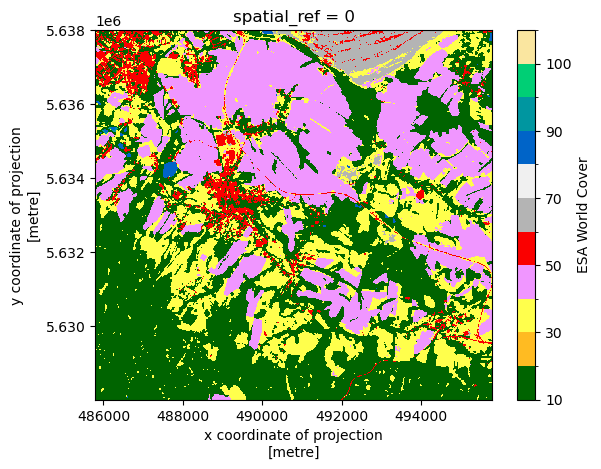

In [11]:
ds.esa_wc.plot(cmap=cmap, norm=norm)

In [12]:
#da = data.lccs_class.isel(time_lccs = 0)
lccs_class_mask = MaskSet(data.lccs_class)
cmap, norm = lccs_class_mask.get_cmap()
lccs_class_mask

Flag name,Mask,Value
no_data,None,0
cropland_rainfed,None,10
cropland_rainfed_herbaceous_cover,None,11
cropland_rainfed_tree_or_shrub_cover,None,12
cropland_irrigated,None,20
mosaic_cropland,None,30
mosaic_natural_vegetation,None,40
tree_broadleaved_evergreen_closed_to_open,None,50
tree_broadleaved_deciduous_closed_to_open,None,60
tree_broadleaved_deciduous_closed,None,61


In [13]:
data

<xarray.Dataset> Size: 56GB
Dimensions:      (time: 1152, y: 1000, x: 1000, time_lccs: 7, band: 12)
Coordinates:
  * band         (band) <U5 240B 'B01' 'B02' 'B03' 'B04' ... 'B09' 'B11' 'B12'
    spatial_ref  int64 8B ...
  * time         (time) datetime64[ns] 9kB 2016-11-02T10:01:52.026000 ... 202...
  * time_lccs    (time_lccs) datetime64[ns] 56B 2016-01-01 ... 2022-01-01
  * x            (x) float64 8kB 4.858e+05 4.858e+05 ... 4.958e+05 4.958e+05
  * y            (y) float64 8kB 5.638e+06 5.638e+06 ... 5.628e+06 5.628e+06
Data variables:
    cloud_mask   (time, y, x) uint8 1GB dask.array<chunksize=(1, 500, 500), meta=np.ndarray>
    lccs_class   (time_lccs, y, x) uint8 7MB dask.array<chunksize=(7, 500, 500), meta=np.ndarray>
    esa_wc       (y, x) uint8 1MB dask.array<chunksize=(500, 500), meta=np.ndarray>
    s2l2a        (band, time, y, x) float32 55GB dask.array<chunksize=(12, 1, 500, 500), meta=np.ndarray>
Attributes: (12/24)
    Conventions:                  CF-1.8
    acknowledgment:               DeepFeatures project
    affine_transform:             [10.0, 0.0, 485796.0, 0.0, -10.0, 5638013.0...
    bbox_utm:                     [485796, 5628013, 495796, 5638013]
    bbox_wgs84:                   [14.79842552765695, 50.803679141900815, 14....
    center_utm:                   [5633013.07427432, 490796.4892066161]
    ...                           ...
    last_modified_datetime:       2025-05-31T15:05:12.757658
    project:                      DeepFeatures
    time_range_end:               2024-12-31
    time_range_start:             2016-11-01
    utm_zone:                     33U
    version:                      0.1.0

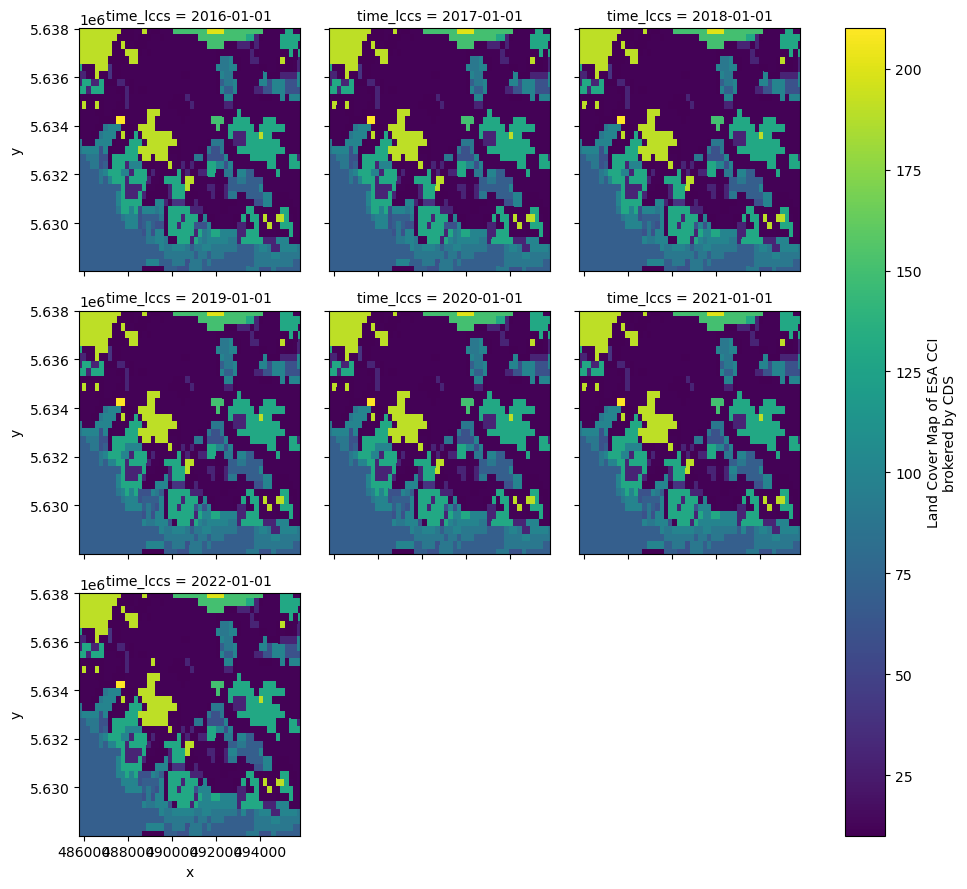

In [14]:
cmap, norm = lccs_class_mask.get_cmap()
ds.lccs_class.plot(cmap=cmap, norm=norm, col="time_lccs", col_wrap=3)

In [15]:
rgb = ds.s2l2a.sel(band = ["B04", "B03", "B02"]).isel(time=200)
rgb_masked = rgb.where(ds.esa_wc == 60)

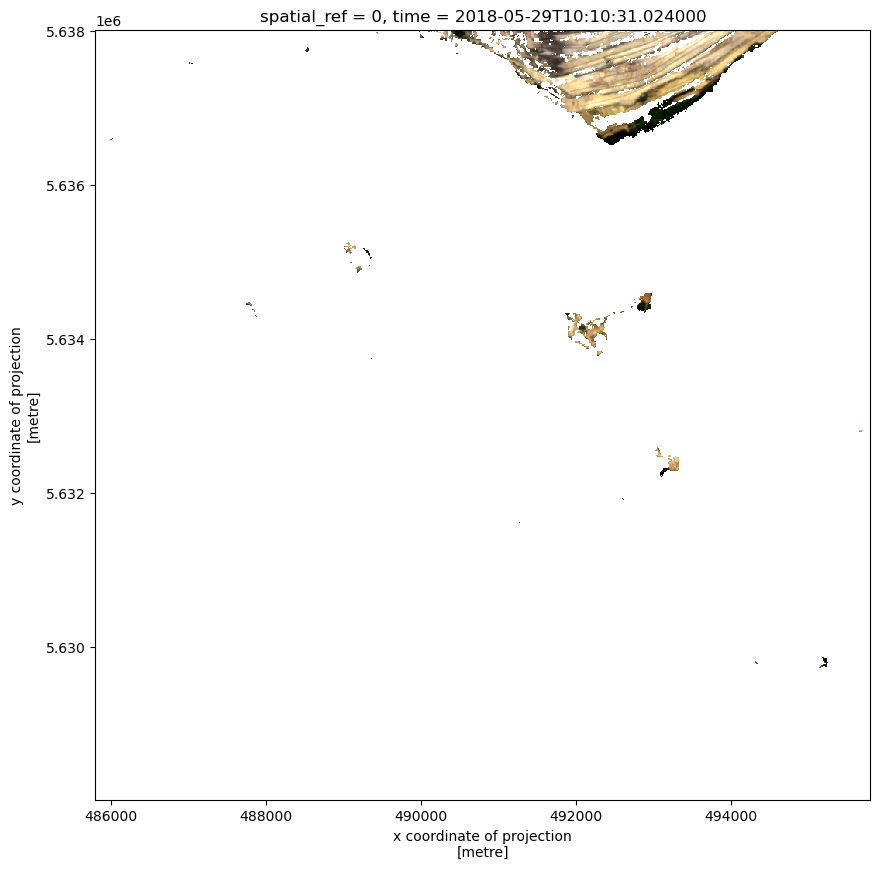

In [16]:
rgb_masked.plot.imshow(robust=True, aspect = 1, size = 10)

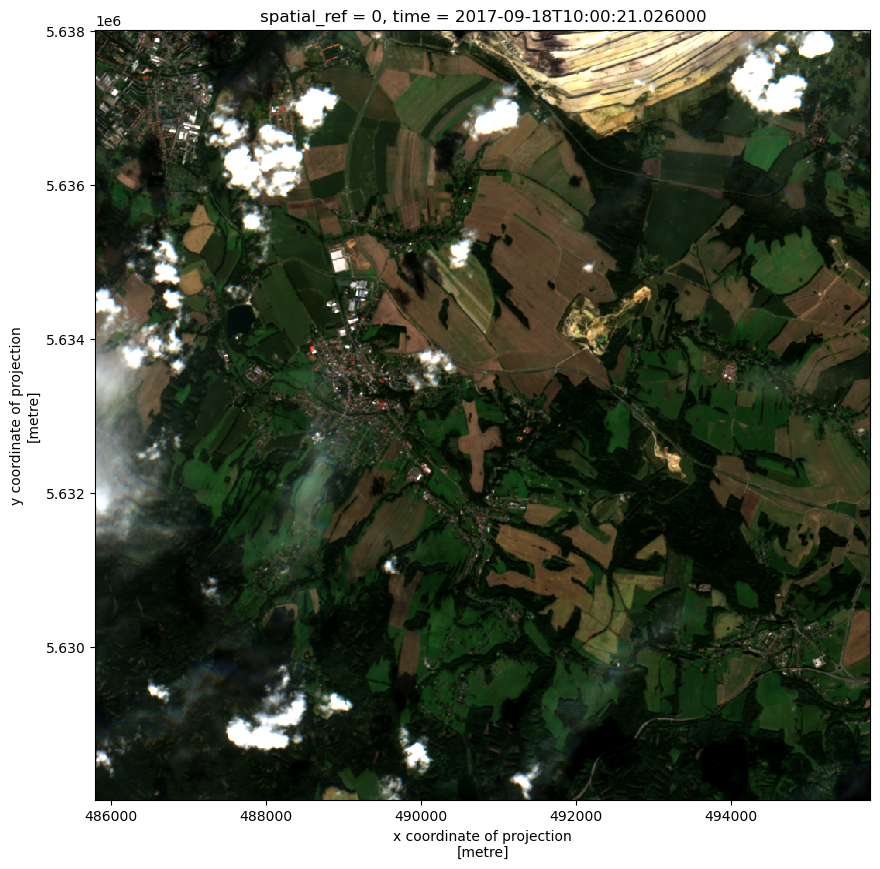

In [18]:
rgb = ds.s2l2a.sel(band = ["B04", "B03", "B02"]).isel(time=100)
rgb_masked = rgb.where(ds.esa_wc == 60)
rgb.plot.imshow(robust=True, aspect = 1, size = 10)